**Problem 1 (20 points)**

Consider the probability distribution defined below. 

| $x$ | $p(x)$ |
|---|---|
| 0 | 0.25 |
| 1 | 0.10 |
| 2 | 0.20 |
| 3 | 0.40 |
| 4 | 0.05 |

(a) Generate 4000 random values ​​that follow this distribution and compare them, using a bar graph, with the theoretical results;

(b) Generate 10 experimental values ​​for $p(x)$ and, taking $x=3$ as a reference, calculate the 95% confidence interval for $p(3)$.

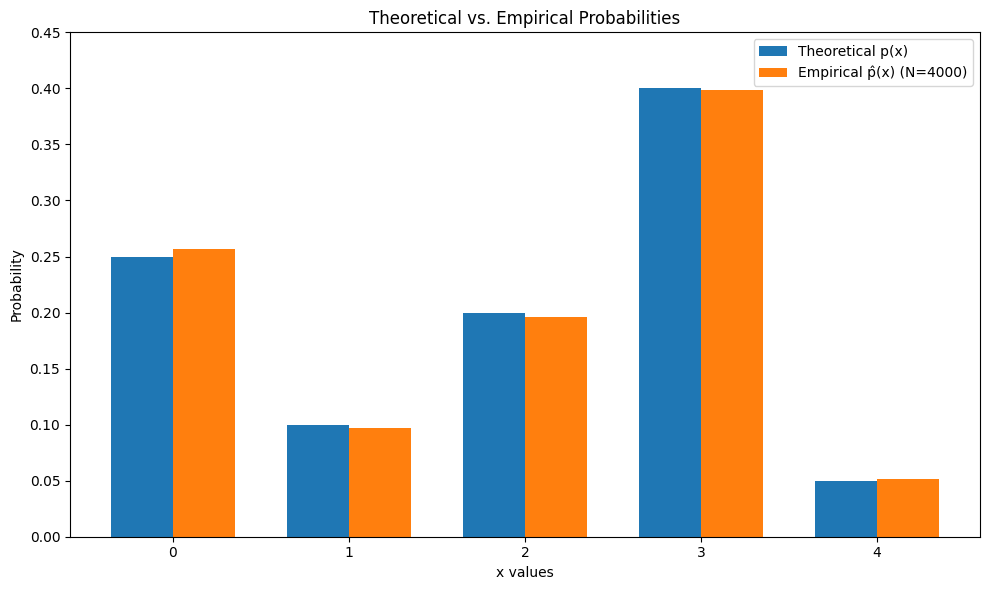

In [62]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Support values and probabilities
x_vals = np.array([0, 1, 2, 3, 4])
probs = np.array([0.25, 0.10, 0.20, 0.40, 0.05])

# Sample size
N = 4000

# Simulate
samples = np.random.choice(x_vals, size=N, p=probs)

# Empirical frequencies
counts = np.bincount(samples, minlength=len(x_vals)) 
empirical_p = counts / N

# Plot: side-by-side bars
width = 0.35
indices = np.arange(len(x_vals))

plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, probs, width=0.35, label="Theoretical p(x)")
plt.bar(indices + width/2, empirical_p, width=0.35, label="Empirical p̂(x) (N=4000)")

plt.xticks(indices, x_vals)
plt.ylim(0, max(probs.max(), empirical_p.max()) + 0.05)
plt.ylabel("Probability")
plt.xlabel("x values")
plt.title("Theoretical vs. Empirical Probabilities")
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# libraries
import numpy as np
import scipy.stats as stats

# Reproducibility
np.random.seed(42)

n_experiments = 10 # number of experiments
n_per_exp = 100  # sample size

# For each experiment, draw n_per_exp samples and compute p̂(3)
p3_hats = []
successes_total = 0
for _ in range(n_experiments):
    samples = np.random.choice(x_vals, size=n_per_exp, p=probs)
    k = np.sum(samples == 3)  # "successes" = count of x=3
    p3_hats.append(k / n_per_exp)
    successes_total += k

N_total = n_experiments * n_per_exp
phat_overall = successes_total / N_total

# 95% confidence interval
def t_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)

    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample standard deviation
    df = n - 1
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df)
    se = std / np.sqrt(n)
    h = t_crit * se
    return mean - h, mean + h, mean

ci_low, ci_high, _ = t_confidence_interval(p3_hats)

# Print results
print("Ten experimental estimates of p(3):")
print(np.round(p3_hats, 4))
print(f"\nMean of the Pooled estimate p̂(3) over {N_total} trials: {phat_overall:.4f}")

print(f"95% CI for p(3): [{ci_low:.2f}, {ci_high:.2f}]")

Ten experimental estimates of p(3):
[0.36 0.4  0.46 0.4  0.36 0.43 0.3  0.47 0.36 0.41]

Mean of the Pooled estimate p̂(3) over 1000 trials: 0.3950
95% CI for p(3): [0.36, 0.43]


**Problem 2 (30 points)**

Consider the empirically generated random values:

$$x= \{1, 3, 3, 4, 6, 7, 10, 15\}$$

(a) Assume that the above data characterize the distribution and find the distribution function $F(x)$.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

sample = np.array([1, 3, 3, 4, 6, 7, 10, 15]) # given data
values, counts = np.unique(sample, return_counts=True) # unique values and their frequencies
pmf_theoretical = counts / counts.sum()  # empirical PMF from data

# Display
print("   x   F(x)")
for v, f in zip(values, cdf):
    print(f"{int(v):>4}  {f:>7.4f}")

   x   F(x)
   1   0.1250
   3   0.3750
   4   0.5000
   6   0.6250
   7   0.7500
  10   0.8750
  15   1.0000


(b) Find the inverse distribution function $F^{-1}(x)$.

In [75]:
def inv_cdf(u, vals=values, c=cdf):
    # returns the smallest vals[j] such that c[j] >= u
    idx = np.searchsorted(c, u, side='left')
    return vals[idx]

c) Generate 1000 random values ​​with the characterized distribution from the above data.

In [109]:
seed = 42
np.random.seed(seed)

N = 1000
U = np.random.random(N)
Xgen = np.array([inv_cdf(u) for u in U])

print("First 20 Generated random values:")
print(Xgen[0:20])  # print first 20 values
unique, counts = np.unique(Xgen, return_counts=True)
print("Unique values:", unique)
print("Counts:", counts)

First 20 Generated random values:
[ 3 15  7  6  3  3  1 10  6  7  1 15 10  3  3  3  3  6  4  3]
Unique values: [ 1  3  4  6  7 10 15]
Counts: [140 255 108 137 117 113 130]


(d) Show the resulting distribution and density functions based on the random values ​​from part c.

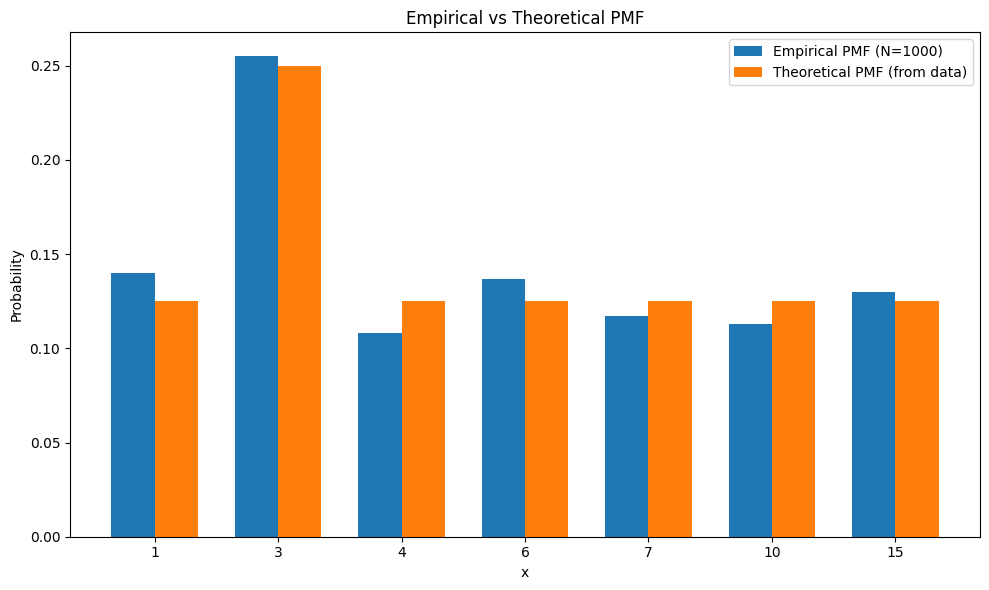

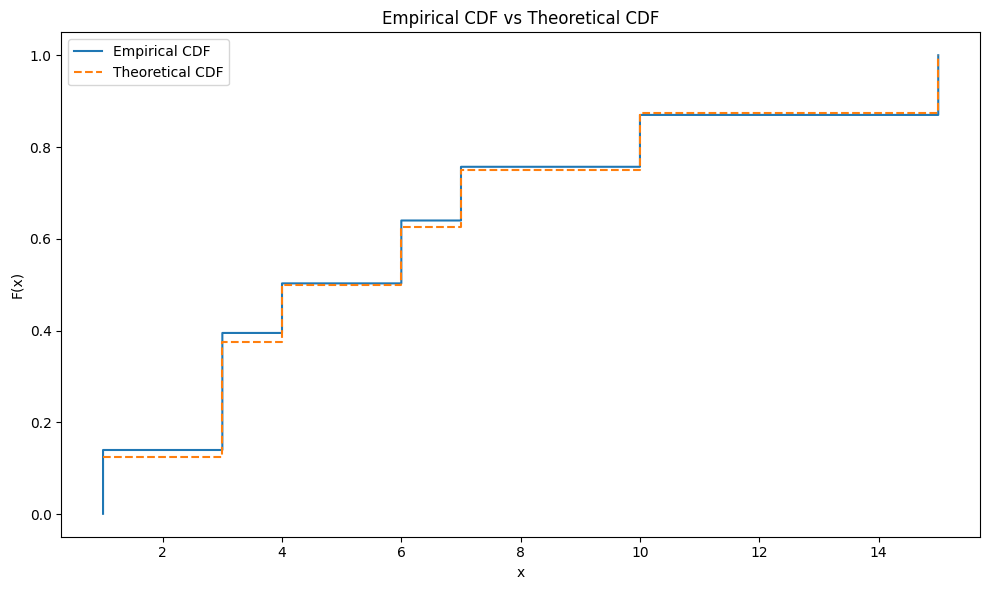

In [111]:
# d. Empirical PMF vs theoretical
vals_emp, counts_emp = np.unique(Xgen, return_counts=True)
pmf_emp = counts_emp / N


# Bar chart: empirical vs theoretical
width = 0.35
xpos = np.arange(len(values))

plt.figure(figsize=(10, 6))
plt.bar(xpos - width/2, pmf_emp, width=0.35, label='Empirical PMF (N=1000)')
plt.bar(xpos + width/2, pmf_theoretical, width=0.35, label='Theoretical PMF (from data)')
plt.xticks(xpos, values)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical PMF')
plt.legend()
plt.tight_layout()
plt.show()

# Empirical CDF (ECDF)
Xsorted = np.sort(Xgen)
Fecdf = np.arange(1, N+1) / N

plt.figure(figsize=(10, 6))

# stairs-like ECDF
plt.step(Xsorted, Fecdf, where='post', label='Empirical CDF')

# overlay theoretical CDF for comparison
theory_x = np.r_[-np.inf, values]  # for visualization, start below min
theory_F = np.r_[0.0, np.cumsum(pmf_theoretical)]
tx_plot = np.r_[values, values[-1]]
tF_plot = np.r_[np.cumsum(pmf_theoretical), 1.0]
plt.step(tx_plot, tF_plot, where='post', label='Theoretical CDF', linestyle='--')

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Empirical CDF vs Theoretical CDF')
plt.legend()
plt.tight_layout()
plt.show()


**Problem 3 (30 points)**

Consider the random process $X(t) = 4 + 3 cos(5t+ θ)$, where θ is uniformly distributed on $[0, 2π]$.

(a) Implement the random generator for θ from a RND in [0, 1[. (It is not necessary to implement a LCG).

(b) Graphically show the autocorrelation function of $X$ for $0 ≤ τ ≤ 0.2$ (step of 0.01) and 0 $≤ τ ≤ 1.5$ (step of 0.1).

(c) Calculate the time averages considering 1000 instances of $X(t)$.

(d) Observe the variation in the time average across instances. Can the process be considered stationary in the broad sense?

xxxxxxxxxxxxxx

**Problem 4 (20 points)**

Consider Example 10, which models additive white noise in a signal. Using the same code as the example, consider the signal amplitude multiplied by a factor of 4 and by a factor of 8.

(a) Plot the resulting signal (signal plus noise), comparing the two new amplitude levels.

(b) What changes from the example? Can any conclusions be drawn about the (pure) signal and noise levels?